In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import PyGnuplot as gp

sns.set()
sns.set_style("whitegrid")



data = pd.read_excel('Allgather-MVAPICH-Innovation.xlsx', sheet_name='Summary')

MessageSizes = list(data['Unnamed: 0'][4:24])



In [104]:
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=20, family='Times')
def my_plot(subplot, x, y, labels):    
    colors = ['blue', 'red', 'green', 'black', 'orange', 'teal', 'purple', 'navy']
    
    for i in range(len(labels)):
        subplot.plot(x, y[i], '-x', color=colors[i], label=labels[i] , markersize=10, linewidth=2)
    
    
    subplot.tick_params(labelsize=14)
    subplot.set_xticks(x[-4:])
    
    
    subplot.set_xlabel('Message Size (B)', fontproperties=font_prop)
    subplot.set_ylabel('Latency (us)', fontproperties=font_prop)
    
    subplot.legend(fontsize=15)
    
def compute_overheads(base, results):
    overheads=[]
    for r in results:
        overheads.append([100*(i-j)/j for i,j in zip(r, base)])
    return overheads

def plot_overheads(x, overheads, labels):
    colors = ['orange', 'red', 'green', 'blue', 'black']
    barwidth = 0.15
    fig =plt.subplots(figsize=(20, 8))
    
    for i in range(len(overheads)):
        x_br = [j + i*barwidth for j in range(len(x))]
        plt.bar(x_br, overheads[i], width=barwidth, label=labels[i], color=colors[i])
        
    plt.xlabel('Message Size (B)', fontproperties=font_prop)
    plt.ylabel('Latency Overhead %', fontproperties=font_prop)
    plt.tick_params(labelsize=14)
    plt.xticks([r + barwidth for r in range(len(x))], [str(s) for s in x])
    plt.legend(fontsize=15)
    plt.show()
    

def categorize(lists, s_t, m_t):
    s_list, m_list, l_list= [], [], []
    for l in lists:
        s_list.append(l[:s_t])
        m_list.append(l[s_t:m_t])
        l_list.append(l[m_t:])
    return s_list, m_list, l_list

# 4 Nodes - 32 ranks

## Unencrypted

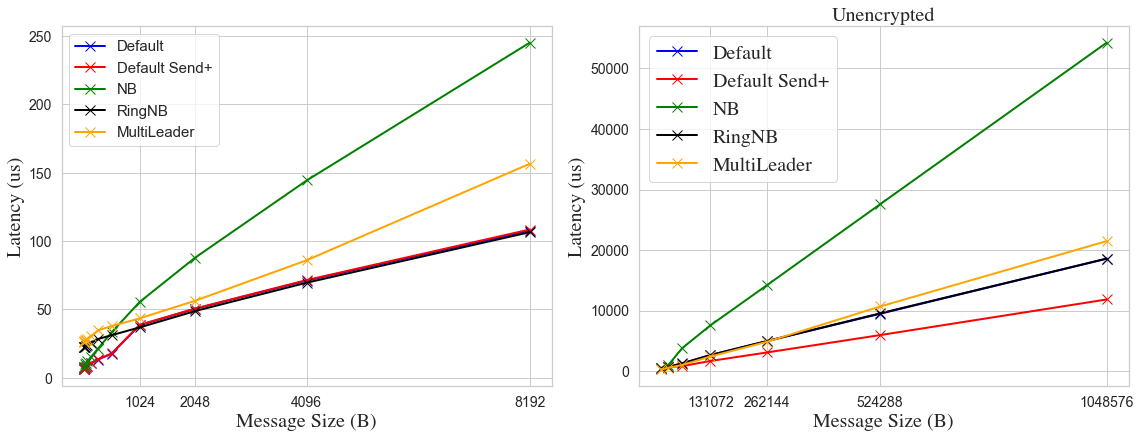

In [4]:
Unenc_Default_4_32 = list(data['Unnamed: 1'][89:109])
Unenc_Default_SendPlus_4_32 = list(data['Unnamed: 2'][89:109])
Unenc_NB_4_32 = list(data['Unnamed: 3'][89:109])
Unenc_RingNB_4_32 = list(data['Unnamed: 4'][89:109])
Unenc_ML_4_32 = list(data['Unnamed: 5'][89:109])

f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)


my_plot(h1, MessageSizes[:13], [Unenc_Default_4_32[:13], Unenc_Default_SendPlus_4_32[:13], Unenc_NB_4_32[:13], Unenc_RingNB_4_32[:13], Unenc_ML_4_32[:13]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])
my_plot(h2, MessageSizes[13:], [Unenc_Default_4_32[13:], Unenc_Default_SendPlus_4_32[13:], Unenc_NB_4_32[13:], Unenc_RingNB_4_32[13:], Unenc_ML_4_32[13:]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])



plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Unencrypted", fontproperties=font_prop)

plt.show()




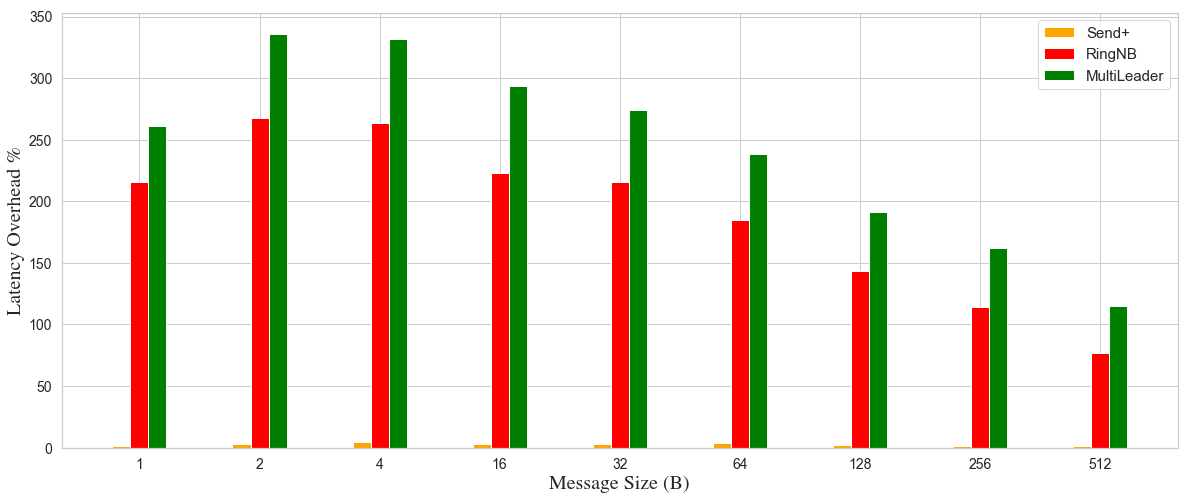

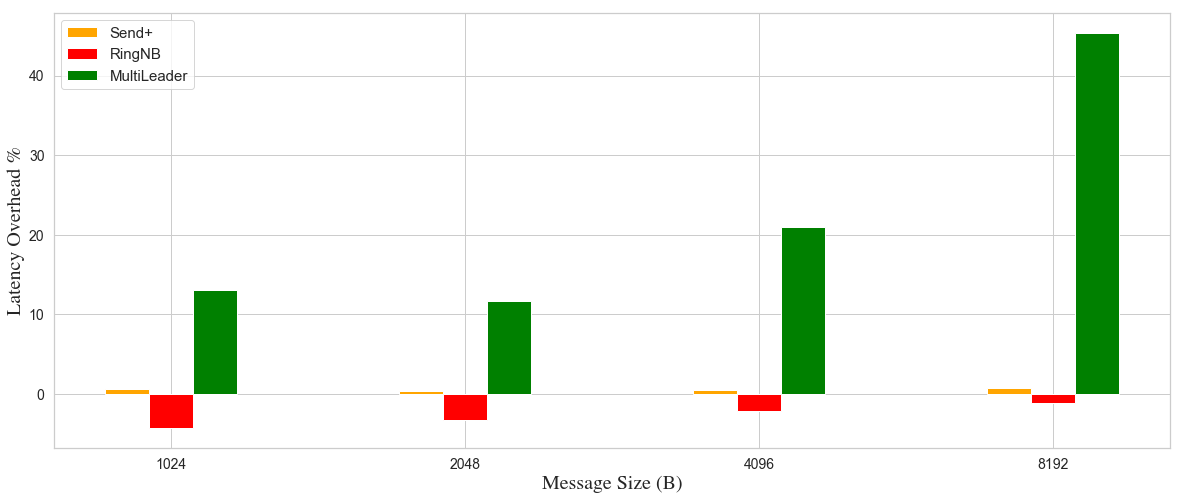

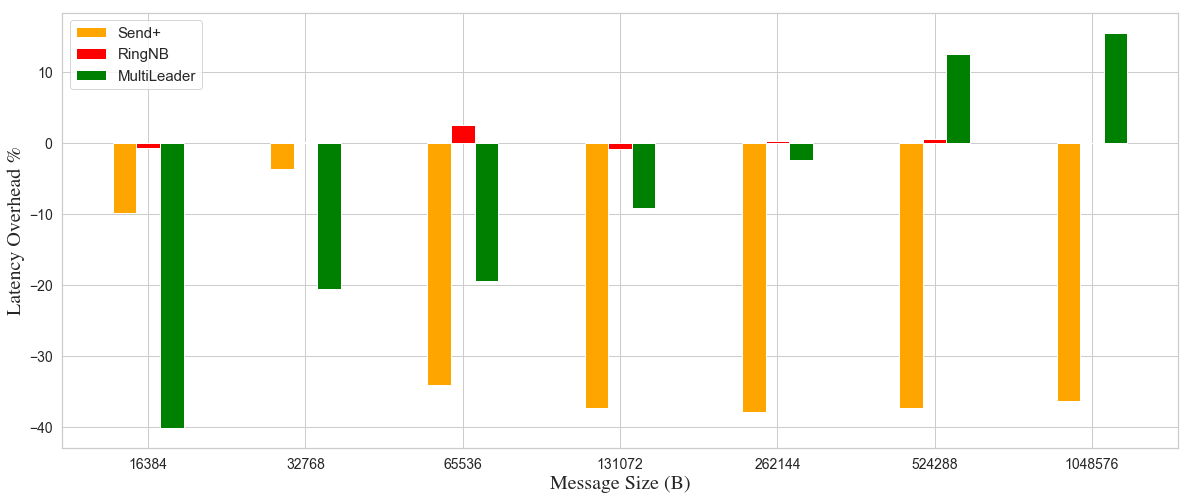

In [105]:
overheads_4_32 = compute_overheads(Unenc_Default_4_32, [Unenc_Default_SendPlus_4_32, Unenc_RingNB_4_32, Unenc_ML_4_32])

first_med_msg_idx = 9
first_large_msgs_idx = 13
s_m_overheads, m_m_overheads, l_m_overheads = categorize(overheads_4_32, first_med_msg_idx, first_large_msgs_idx)


plot_overheads(MessageSizes[:first_med_msg_idx], s_m_overheads, ['Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_med_msg_idx:first_large_msgs_idx], m_m_overheads, ['Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads, ['Send+', 'RingNB', 'MultiLeader'])




## Naive

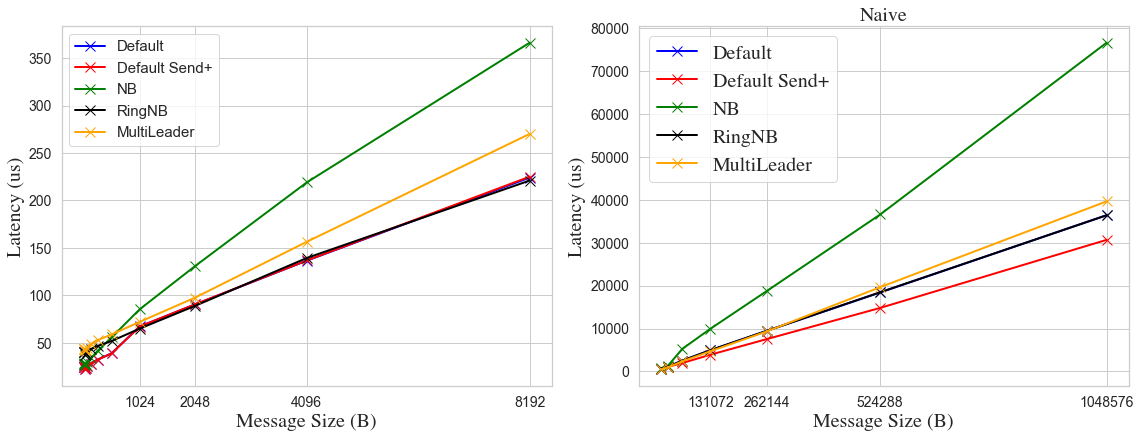

In [54]:
Naive_Default_4_32 = list(data['Unnamed: 6'][89:109])
Naive_Default_SendPlus_4_32 = list(data['Unnamed: 7'][89:109])
Naive_NB_4_32 = list(data['Unnamed: 8'][89:109])
Naive_RingNB_4_32 = list(data['Unnamed: 9'][89:109])
Naive_ML_4_32 = list(data['Unnamed: 10'][89:109])

f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)


my_plot(h1, MessageSizes[:13], [Naive_Default_4_32[:13], Naive_Default_SendPlus_4_32[:13], Naive_NB_4_32[:13], Naive_RingNB_4_32[:13], Naive_ML_4_32[:13]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])
my_plot(h2, MessageSizes[13:], [Naive_Default_4_32[13:], Naive_Default_SendPlus_4_32[13:], Naive_NB_4_32[13:], Naive_RingNB_4_32[13:], Naive_ML_4_32[13:]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])



plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Naive", fontproperties=font_prop)

plt.show()


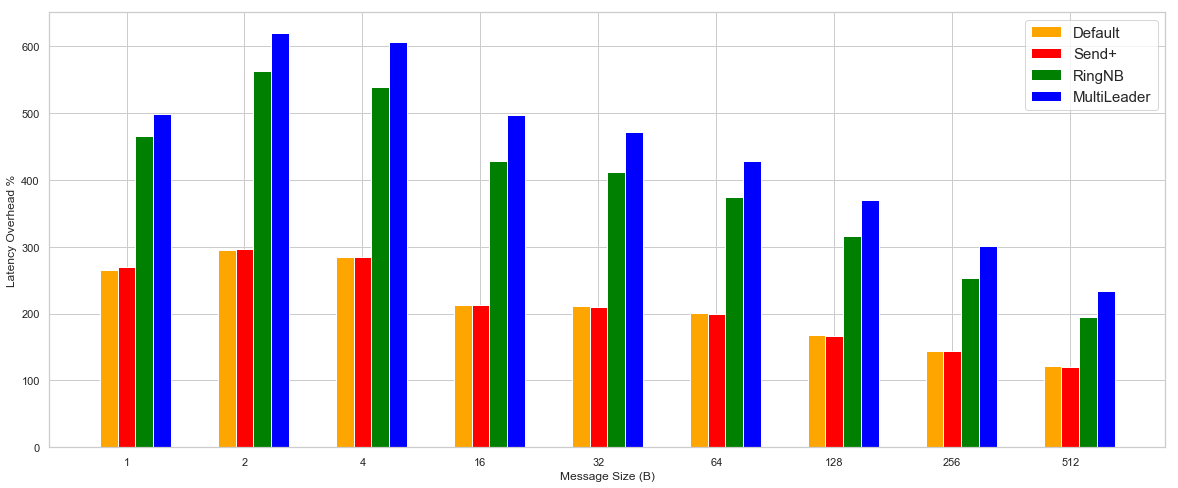

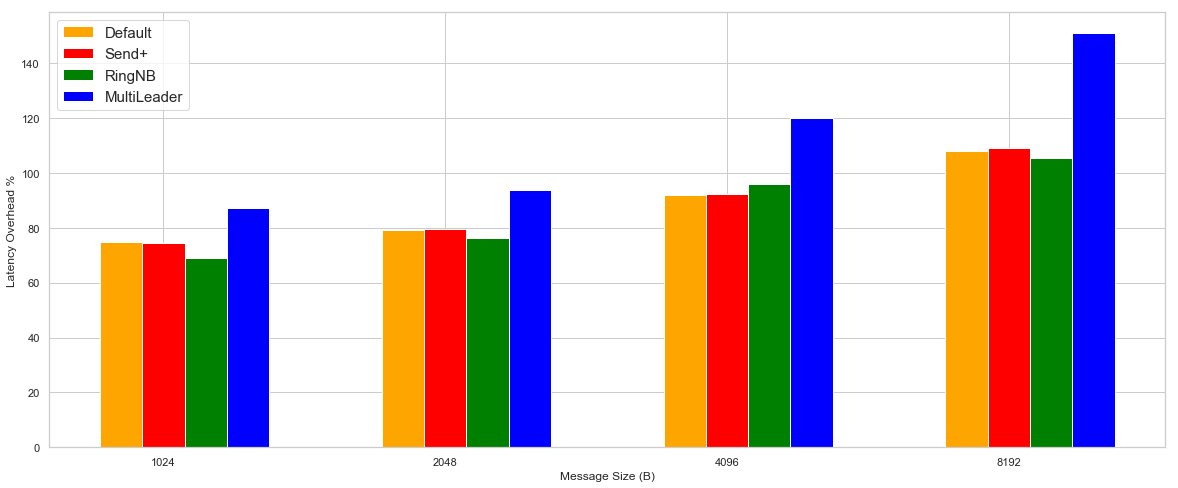

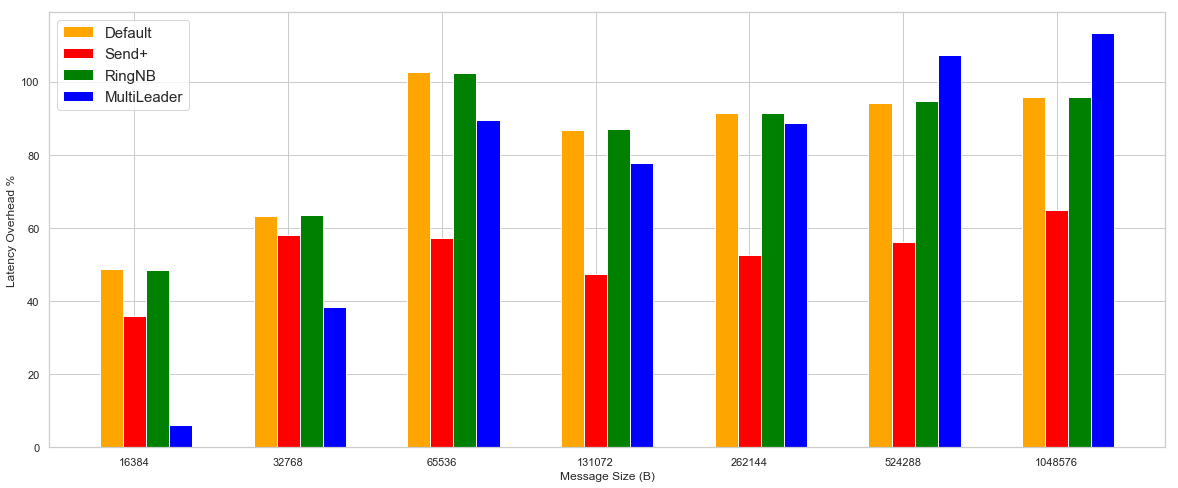

In [84]:
overheads_Naiuve_4_32 = compute_overheads(Unenc_Default_4_32, [Naive_Default_4_32, Naive_Default_SendPlus_4_32, Naive_RingNB_4_32, Naive_ML_4_32])


first_med_msg_idx = 9
first_large_msgs_idx = 13
s_m_overheads, m_m_overheads, l_m_overheads = categorize(overheads_Naiuve_4_32, first_med_msg_idx, first_large_msgs_idx)


plot_overheads(MessageSizes[:first_med_msg_idx], s_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_med_msg_idx:first_large_msgs_idx], m_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])




## Naive+

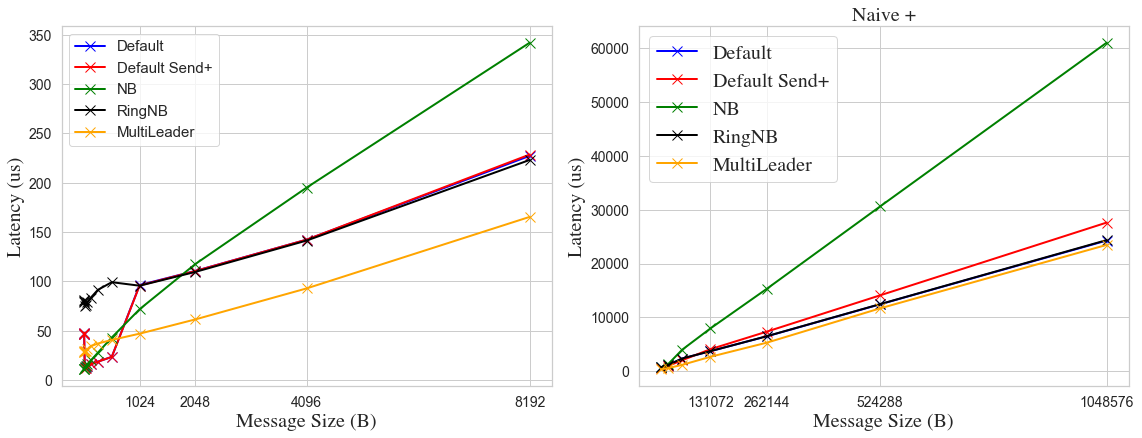

In [85]:
NaivePlus_Default_4_32 = list(data['Unnamed: 11'][89:109])
NaivePlus_Default_SendPlus_4_32 = list(data['Unnamed: 12'][89:109])
NaivePlus_NB_4_32 = list(data['Unnamed: 13'][89:109])
NaivePlus_RingNB_4_32 = list(data['Unnamed: 14'][89:109])
NaivePlus_ML_4_32 = list(data['Unnamed: 15'][89:109])

f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)


my_plot(h1, MessageSizes[:13], [NaivePlus_Default_4_32[:13], NaivePlus_Default_SendPlus_4_32[:13], NaivePlus_NB_4_32[:13], NaivePlus_RingNB_4_32[:13], NaivePlus_ML_4_32[:13]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])
my_plot(h2, MessageSizes[13:], [NaivePlus_Default_4_32[13:], NaivePlus_Default_SendPlus_4_32[13:], NaivePlus_NB_4_32[13:], NaivePlus_RingNB_4_32[13:], NaivePlus_ML_4_32[13:]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])



plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Naive +", fontproperties=font_prop)

plt.show()



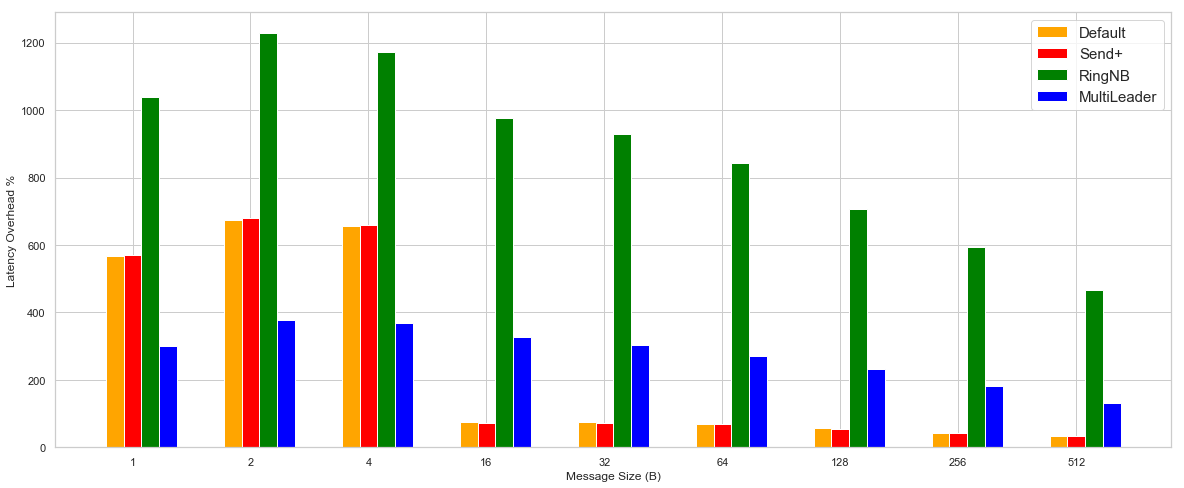

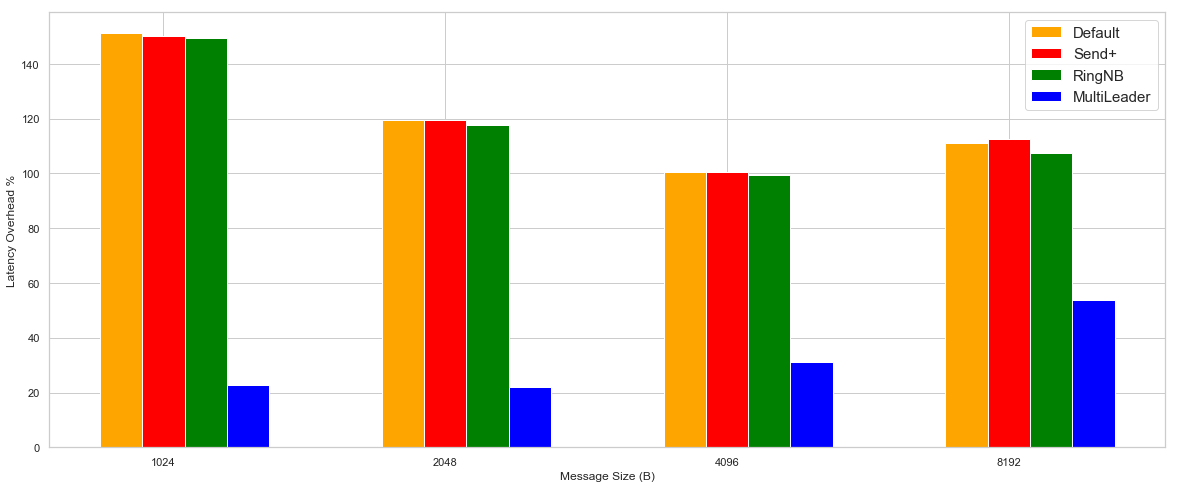

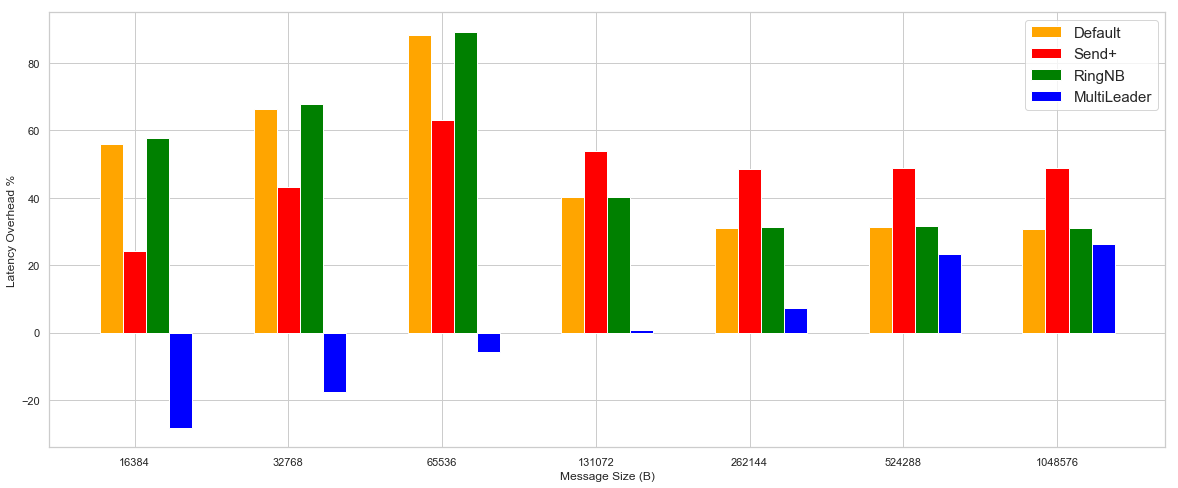

In [86]:
overheads_NaivePlus_4_32 = compute_overheads(Unenc_Default_4_32, [NaivePlus_Default_4_32, NaivePlus_Default_SendPlus_4_32, NaivePlus_RingNB_4_32, NaivePlus_ML_4_32])

first_med_msg_idx = 9
first_large_msgs_idx = 13
s_m_overheads, m_m_overheads, l_m_overheads = categorize(overheads_NaivePlus_4_32, first_med_msg_idx, first_large_msgs_idx)


plot_overheads(MessageSizes[:first_med_msg_idx], s_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_med_msg_idx:first_large_msgs_idx], m_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])



# 4 Nodes - 64 ranks

## Unencrupted

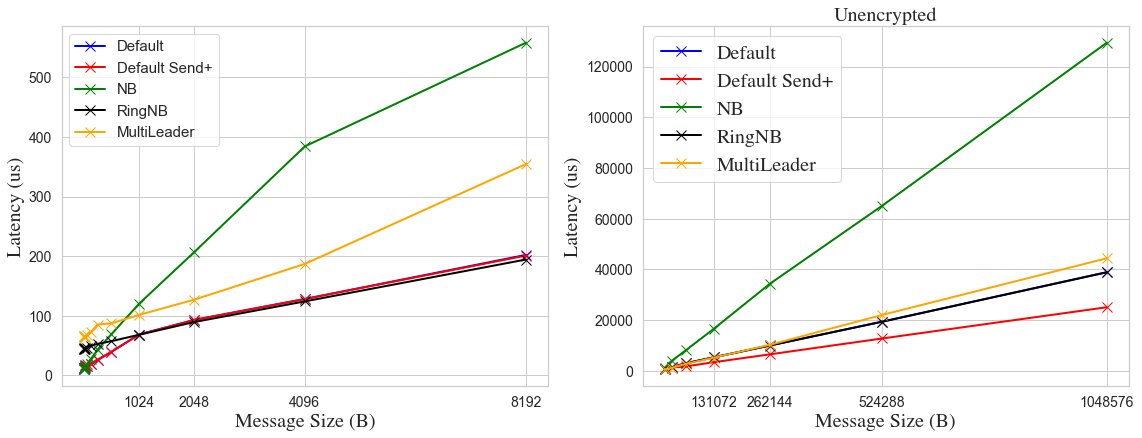

In [88]:
Unenc_Default_4 = list(data['Unnamed: 1'][145:165])
Unenc_Default_SendPlus_4 = list(data['Unnamed: 2'][145:165])
Unenc_NB_4 = list(data['Unnamed: 3'][145:165])
Unenc_RingNB_4 = list(data['Unnamed: 4'][145:165])
Unenc_ML_4 = list(data['Unnamed: 5'][145:165])

f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)


my_plot(h1, MessageSizes[:13], [Unenc_Default_4[:13], Unenc_Default_SendPlus_4[:13], Unenc_NB_4[:13], Unenc_RingNB_4[:13], Unenc_ML_4[:13]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])
my_plot(h2, MessageSizes[13:], [Unenc_Default_4[13:], Unenc_Default_SendPlus_4[13:], Unenc_NB_4[13:], Unenc_RingNB_4[13:], Unenc_ML_4[13:]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])



plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Unencrypted", fontproperties=font_prop)

plt.show()



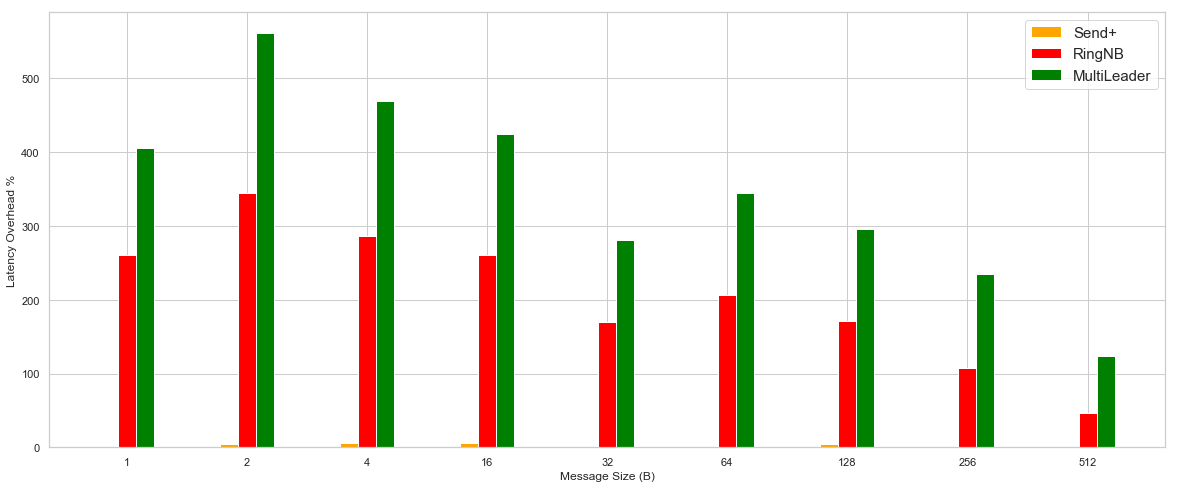

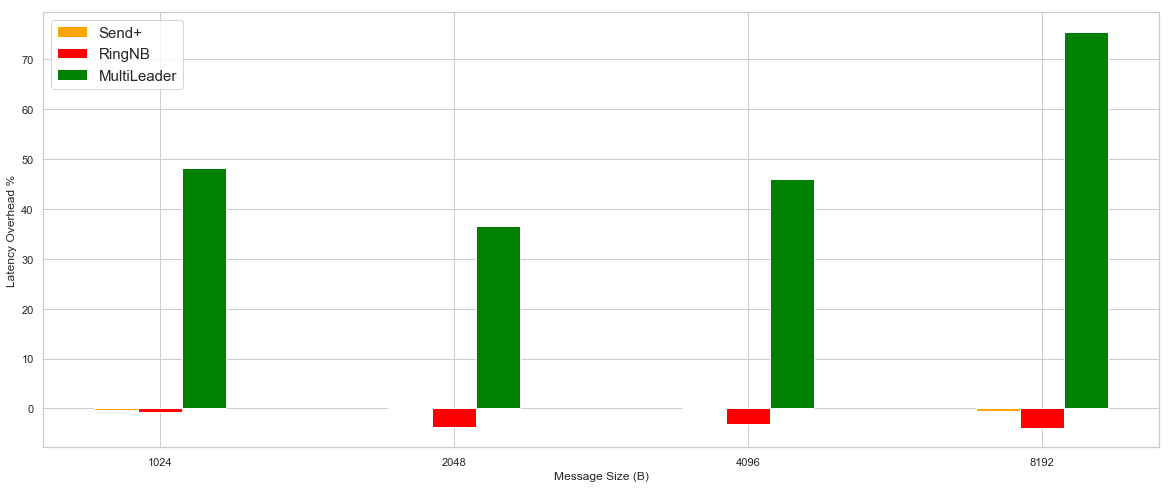

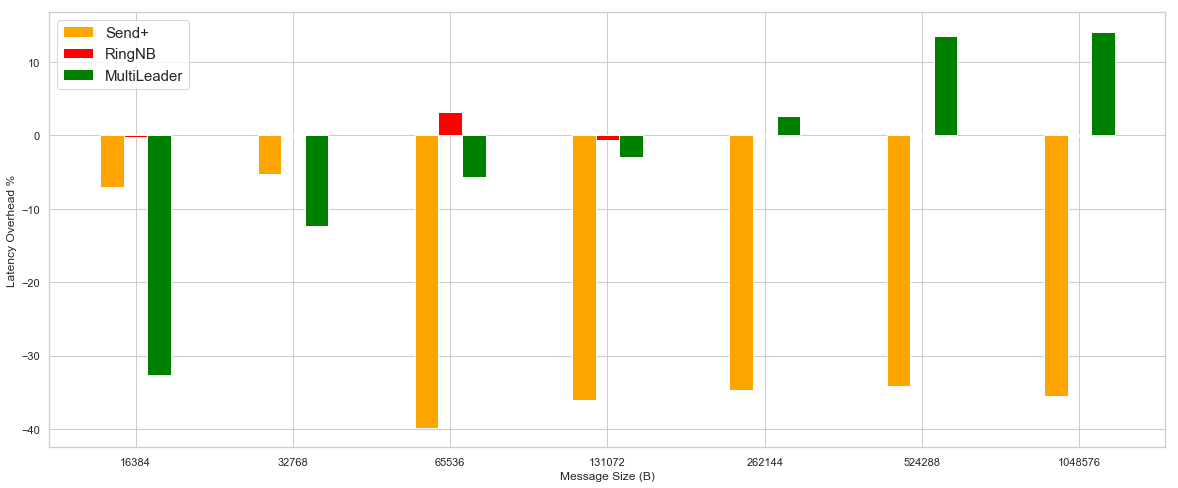

In [91]:
overheads_4 = compute_overheads(Unenc_Default_4, [Unenc_Default_SendPlus_4, Unenc_RingNB_4, Unenc_ML_4])

first_med_msg_idx = 9
first_large_msgs_idx = 13
s_m_overheads, m_m_overheads, l_m_overheads = categorize(overheads_4, first_med_msg_idx, first_large_msgs_idx)


plot_overheads(MessageSizes[:first_med_msg_idx], s_m_overheads, ['Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_med_msg_idx:first_large_msgs_idx], m_m_overheads, ['Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads, ['Send+', 'RingNB', 'MultiLeader'])





## Naive

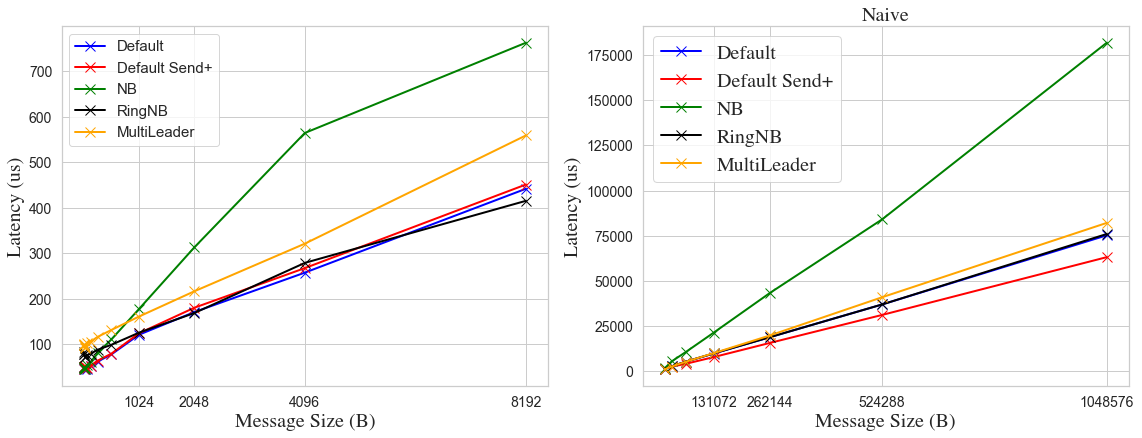

In [92]:
Naive_Default_4 = list(data['Unnamed: 6'][145:165])
Naive_Default_SendPlus_4 = list(data['Unnamed: 7'][145:165])
Naive_NB_4 = list(data['Unnamed: 8'][145:165])
Naive_RingNB_4 = list(data['Unnamed: 9'][145:165])
Naive_ML_4 = list(data['Unnamed: 10'][145:165])

f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)


my_plot(h1, MessageSizes[:13], [Naive_Default_4[:13], Naive_Default_SendPlus_4[:13], Naive_NB_4[:13], Naive_RingNB_4[:13], Naive_ML_4[:13]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])
my_plot(h2, MessageSizes[13:], [Naive_Default_4[13:], Naive_Default_SendPlus_4[13:], Naive_NB_4[13:], Naive_RingNB_4[13:], Naive_ML_4[13:]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])



plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Naive", fontproperties=font_prop)

plt.show()



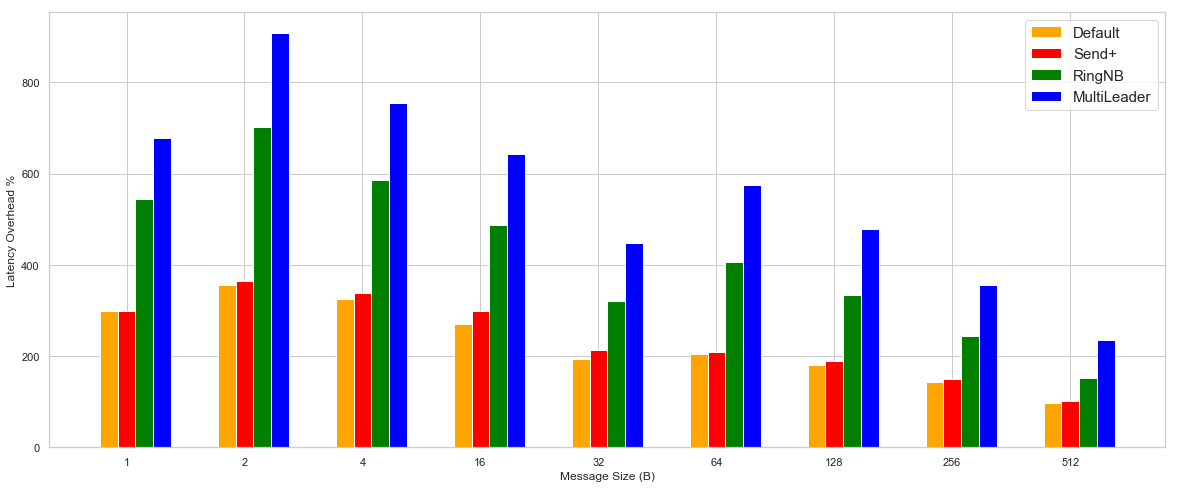

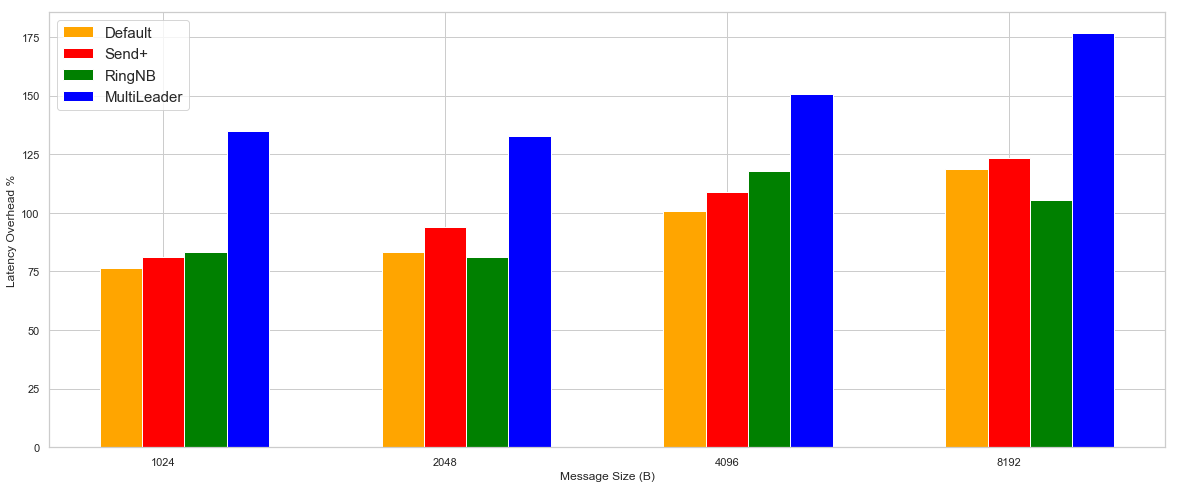

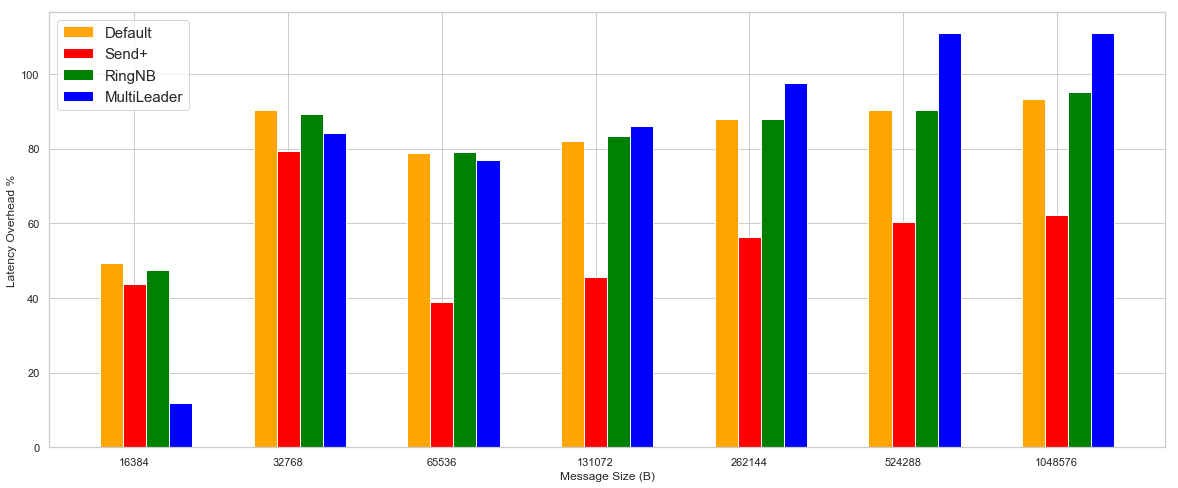

In [94]:
overheads_4 = compute_overheads(Unenc_Default_4, [Naive_Default_4, Naive_Default_SendPlus_4, Naive_RingNB_4, Naive_ML_4])

first_med_msg_idx = 9
first_large_msgs_idx = 13
s_m_overheads, m_m_overheads, l_m_overheads = categorize(overheads_4, first_med_msg_idx, first_large_msgs_idx)


plot_overheads(MessageSizes[:first_med_msg_idx], s_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_med_msg_idx:first_large_msgs_idx], m_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])






## Naive+

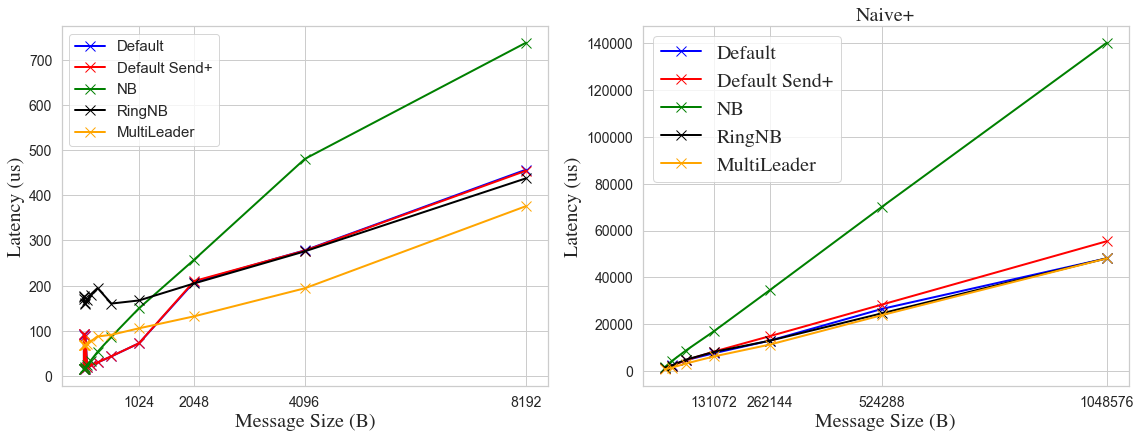

In [99]:
NaivePlus_Default_4 = list(data['Unnamed: 11'][145:165])
NaivePlus_Default_SendPlus_4 = list(data['Unnamed: 12'][145:165])
NaivePlus_NB_4 = list(data['Unnamed: 13'][145:165])
NaivePlus_RingNB_4 = list(data['Unnamed: 14'][145:165])
NaivePlus_ML_4 = list(data['Unnamed: 15'][145:165])

f = plt.figure(figsize=(16,6))
h1 = f.add_subplot(121)
h2 = f.add_subplot(122)


my_plot(h1, MessageSizes[:13], [NaivePlus_Default_4[:13], NaivePlus_Default_SendPLus_4[:13], NaivePlus_NB_4[:13], NaivePlus_RingNB_4[:13], NaivePlus_ML_4[:13]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])
my_plot(h2, MessageSizes[13:], [NaivePlus_Default_4[13:], NaivePlus_Default_SendPLus_4[13:], NaivePlus_NB_4[13:], NaivePlus_RingNB_4[13:], NaivePlus_ML_4[13:]], ['Default', 'Default Send+', 'NB', 'RingNB', 'MultiLeader'])

plt.legend(prop=font_prop)
plt.tight_layout()
plt.title("Naive+", fontproperties=font_prop)
plt.show()

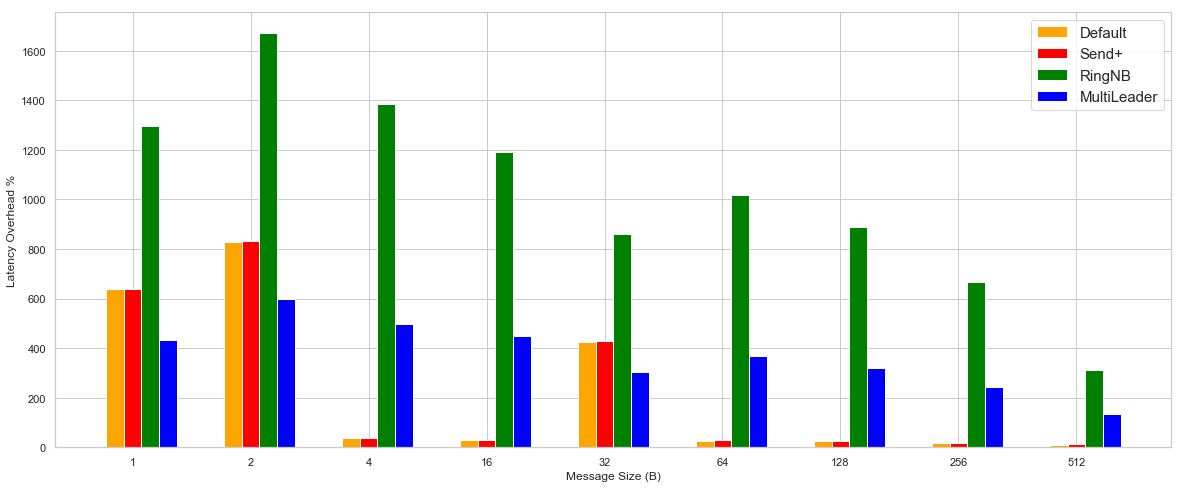

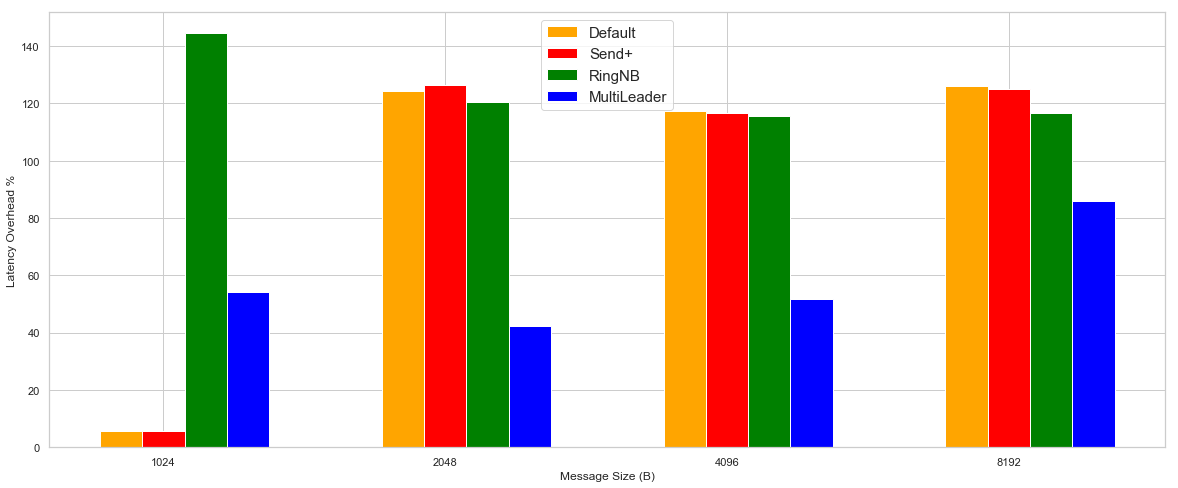

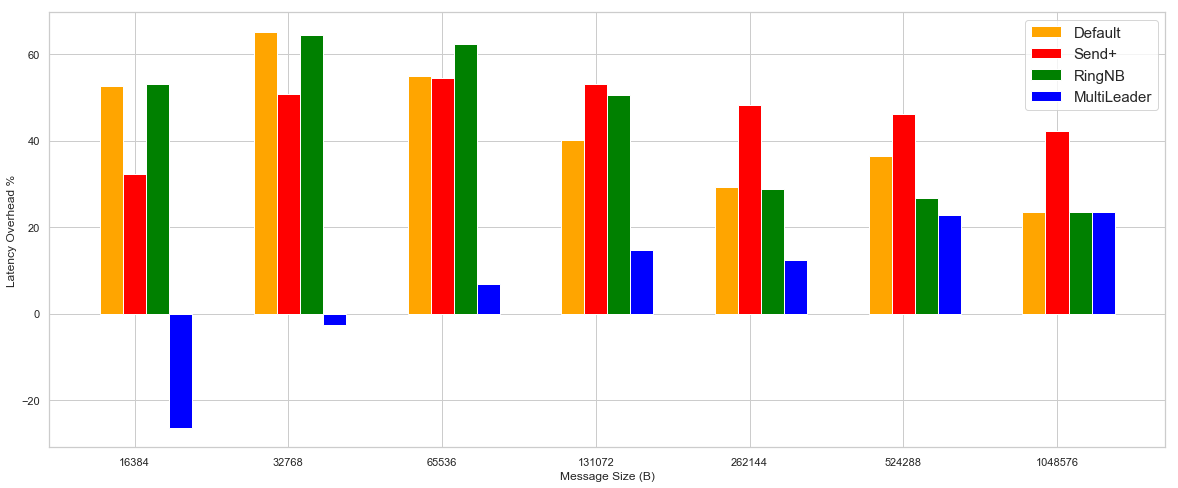

In [100]:
overheads_4 = compute_overheads(Unenc_Default_4, [NaivePlus_Default_4, NaivePlus_Default_SendPlus_4, NaivePlus_RingNB_4, NaivePlus_ML_4])

first_med_msg_idx = 9
first_large_msgs_idx = 13
s_m_overheads, m_m_overheads, l_m_overheads = categorize(overheads_4, first_med_msg_idx, first_large_msgs_idx)


plot_overheads(MessageSizes[:first_med_msg_idx], s_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_med_msg_idx:first_large_msgs_idx], m_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads, ['Default', 'Send+', 'RingNB', 'MultiLeader'])

